# Exercise 1

In [53]:
import os
import struct
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Flatten

In [54]:
# No modifiques esta función
def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

def load_data(path_imgs, path_labels):
    # Cargar las imágenes y etiquetas
    X = read_idx(path_imgs)
    y = read_idx(path_labels)
    # Normalizar las imágenes
    X = X.astype(np.float32) / 255.0
    # Dividir el dataset en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

    return X_train, y_train, X_test, y_test

Dataset shape: (48000, 28, 28) [n_images,height,width]


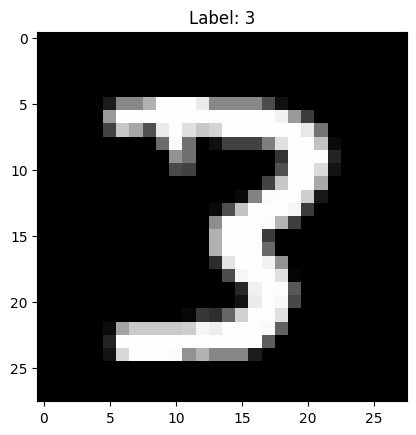

In [55]:
imgs = './data/train-images.idx3-ubyte'
labels = './data/train-labels.idx1-ubyte'

pixelsX = 28
pixelsY = 28

X_train, y_train, X_test, y_test = load_data(imgs, labels)

print('Dataset shape:', X_train.shape, "[n_images,height,width]")
plt.imshow(X_train[0].reshape(pixelsX, pixelsY), cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

# Exercise 2

In [56]:

def create_model(input_shape, num_classes):
    model = keras.models.Sequential()

    model.add(keras.layers.Flatten(input_shape=input_shape))
    model.add(keras.layers.Dense(units=64, activation='relu'))
    model.add(keras.layers.Dense(units=32,activation='relu'))
    model.add(keras.layers.Dense(units=16, activation='relu'))
    model.add(keras.layers.Dense(units=num_classes, activation='softmax'))
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',
                   metrics=['acc'])
    return model

In [57]:
create_model((28, 28), 10).summary()

c:\Users\Ian Salas López\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_12 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,018 (207.10 KB)

 Trainable params: 53,018 (207.10 KB)

 Non-trainable params: 0 (0.00 B)

# Exercise 3

In [58]:
# Crea una función que entrene tu modelo.
def train_model(model, train_data, test_data, batch_size=32, epochs=10):

    history = model.fit(train_data[0], train_data[1], validation_data=test_data,batch_size=batch_size,
                        epochs=epochs, verbose=2)
    return history

## Llama a tu función load_data()
X_train, y_train, X_test, y_test = load_data(path_imgs=imgs, path_labels=labels)

# crea y entrena el modelo
model = create_model(input_shape=(pixelsX, pixelsY), num_classes=10)
trained_model = train_model(
                  model,
                  train_data=(X_train, y_train),
                  test_data=(X_test,y_test),
                  batch_size=32,
                  epochs=10
                  )

Epoch 1/10
1500/1500 - 5s - 4ms/step - acc: 0.8894 - loss: 0.3783 - val_acc: 0.9431 - val_loss: 0.1879
Epoch 2/10
1500/1500 - 4s - 2ms/step - acc: 0.9538 - loss: 0.1553 - val_acc: 0.9563 - val_loss: 0.1491
Epoch 3/10
1500/1500 - 4s - 3ms/step - acc: 0.9663 - loss: 0.1125 - val_acc: 0.9652 - val_loss: 0.1141
Epoch 4/10
1500/1500 - 3s - 2ms/step - acc: 0.9731 - loss: 0.0900 - val_acc: 0.9610 - val_loss: 0.1280
Epoch 5/10
1500/1500 - 4s - 2ms/step - acc: 0.9765 - loss: 0.0753 - val_acc: 0.9665 - val_loss: 0.1083
Epoch 6/10
1500/1500 - 4s - 2ms/step - acc: 0.9799 - loss: 0.0634 - val_acc: 0.9688 - val_loss: 0.1060
Epoch 7/10
1500/1500 - 4s - 3ms/step - acc: 0.9821 - loss: 0.0556 - val_acc: 0.9650 - val_loss: 0.1162
Epoch 8/10
1500/1500 - 4s - 2ms/step - acc: 0.9850 - loss: 0.0469 - val_acc: 0.9690 - val_loss: 0.1069
Epoch 9/10
1500/1500 - 4s - 2ms/step - acc: 0.9859 - loss: 0.0425 - val_acc: 0.9705 - val_loss: 0.1139
Epoch 10/10
1500/1500 - 4s - 2ms/step - acc: 0.9884 - loss: 0.0359 - val_

In [59]:
def convolve(sequence, weights):
    convolution = np.zeros(len(sequence) - len(weights) + 1)
    for i in range(convolution.shape[0]):
        convolution[i] = np.sum(
            np.array(weights) * np.array(sequence[i : i + len(weights)])
        )
    return convolution

In [60]:
s = [1, 5, 6]
w = [1,   2]

In [61]:
convolve(s,w)

array([11., 17.])